# Task 1A

# three-layer convolutional neural network

In [11]:


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1) 
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 2) 
train_dataset = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor\train",
    transform=train_transforms
)
val_dataset = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor\valid",  
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Train classes:", train_dataset.classes)

# 3) 
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 224 -> pool -> 112 -> pool -> 56 -> pool -> 28
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> [batch,16,112,112]
        x = self.pool(F.relu(self.conv2(x)))  # -> [batch,32,56,56]
        x = self.pool(F.relu(self.conv3(x)))  # -> [batch,64,28,28]
        x = x.view(x.size(0), -1)             # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BrainTumorCNN(num_classes=4)

# 4) 
device = torch.device("cuda")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 5) 
EPOCHS = 30
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * images.size(0)

    epoch_train_loss = running_train_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_dataset)
    val_losses.append(epoch_val_loss)

    epoch_val_acc = correct / total
    val_accuracies.append(epoch_val_acc)

    print(f"Epoch [{epoch+1}/{EPOCHS}] - "
          f"Train Loss: {epoch_train_loss:.4f} - "
          f"Val Loss: {epoch_val_loss:.4f} - "
          f"Val Acc: {epoch_val_acc:.4f}")


# 6) 
save_path = r"D:\Desktop\ai\brain3_tumor_big_cnn.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")


Train classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Epoch [1/30] - Train Loss: 0.8200 - Val Loss: 0.7069 - Val Acc: 0.7498
Epoch [2/30] - Train Loss: 0.4455 - Val Loss: 0.4312 - Val Acc: 0.8185
Epoch [3/30] - Train Loss: 0.2784 - Val Loss: 0.3127 - Val Acc: 0.8703
Epoch [4/30] - Train Loss: 0.1939 - Val Loss: 0.2532 - Val Acc: 0.9024
Epoch [5/30] - Train Loss: 0.1112 - Val Loss: 0.2159 - Val Acc: 0.9245
Epoch [6/30] - Train Loss: 0.0765 - Val Loss: 0.1609 - Val Acc: 0.9489
Epoch [7/30] - Train Loss: 0.0413 - Val Loss: 0.1448 - Val Acc: 0.9580
Epoch [8/30] - Train Loss: 0.0287 - Val Loss: 0.1451 - Val Acc: 0.9634
Epoch [9/30] - Train Loss: 0.0206 - Val Loss: 0.3760 - Val Acc: 0.9138
Epoch [10/30] - Train Loss: 0.0259 - Val Loss: 0.1226 - Val Acc: 0.9641
Epoch [11/30] - Train Loss: 0.0084 - Val Loss: 0.1522 - Val Acc: 0.9664
Epoch [12/30] - Train Loss: 0.0060 - Val Loss: 0.1312 - Val Acc: 0.9718
Epoch [13/30] - Train Loss: 0.0006 - Val Loss: 0.1427 - Val Acc: 0.9710
Epoch [14




-  After around 15 epochs, I observed that the training loss, validation loss, and validation accuracy had stabilized, with minimal changes between epochs.

# Plot and evaluate

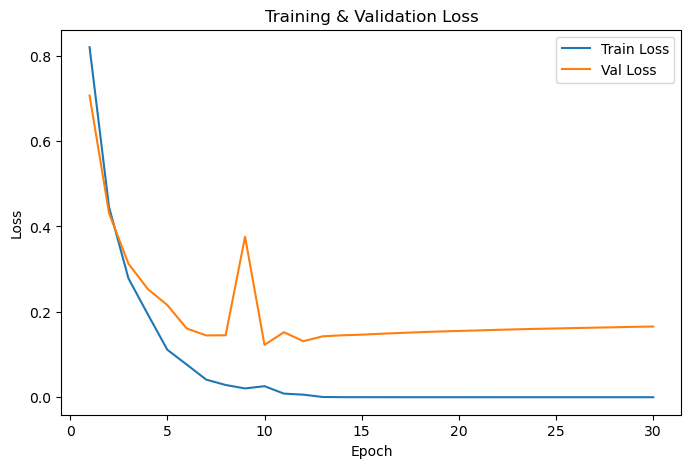

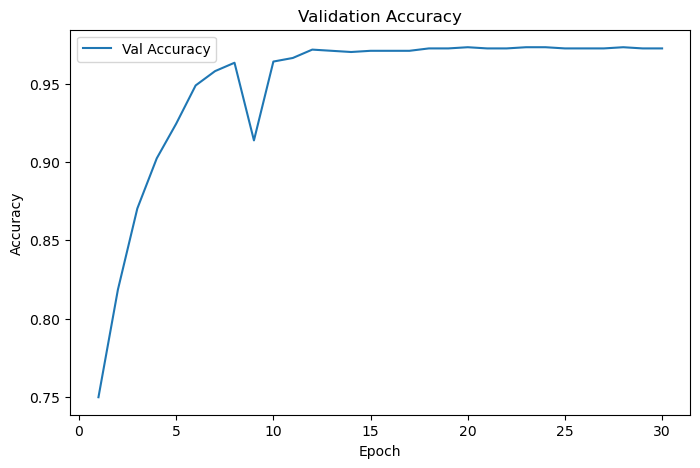

In [12]:
####################################
# Block 2: Plot training curves
####################################

import matplotlib.pyplot as plt

# 假设 train_losses, val_losses, val_accuracies 还在内存里
EPOCHS = len(train_losses)

plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), train_losses, label='Train Loss')
plt.plot(range(1, EPOCHS+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()


- The training loss drops nearly to zero, indicating an almost perfect fit on the training data, which suggests some degree of overfitting.
- Despite this, the validation accuracy remains consistently around 97%, reflecting excellent overall performance.
- The model appears to converge by approximately 10–15 epochs, with additional epochs yielding minimal improvements.

# the model’s state_dict and verification

In [13]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1) 
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 224 -> pool -> 112 -> pool -> 56 -> pool -> 28
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> [batch,16,112,112]
        x = self.pool(F.relu(self.conv2(x)))  # -> [batch,32,56,56]
        x = self.pool(F.relu(self.conv3(x)))  # -> [batch,64,28,28]
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2) 
model_test = BrainTumorCNN(num_classes=4)

# 3) 
checkpoint_path = r"D:\Desktop\ai\brain3_tumor_big_cnn.pth"
model_test.load_state_dict(torch.load(checkpoint_path, map_location="cpu"))
model_test.eval()
print(f"Loaded model parameters from: {checkpoint_path}")

# 4) 
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 5) 
val_dataset = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor\valid",
    transform=val_transforms
)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 6) 
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model_test(images)  
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_acc = correct / total
print(f"Validation accuracy (loaded model) = {val_acc:.4f}")


C:\Users\84359\AppData\Local\Temp\ipykernel_11544\502793423.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load(checkpoint_path, map_l

Loaded model parameters from: D:\Desktop\ai\brain3_tumor_big_cnn.pth
Validation accuracy (loaded model) = 0.9725


## Task 1A

In this task you need to build a model using the the big dataset with $7023$ MRI images. You have complete freedom: you need to decide all the steps you need to take. These steps may involve

- How do you want to read the images and store the data?
- I use ImageFolder to read the data, and use DataLoader to package it into batches for training. The training set and validation set are stored separately and read separately.

- What machine learning model do you want to use? 
- I decided on a custom three-layer convolutional neural network (CNN),because CNNs capture spatial features effectively and perform well on image classification tasks, including MRI scans.

- How do you build such a model using the building blocks such as linear layer, convolution layer, pooling layers and so on. You can use more complex layers in PyTorch if you want.
- I build the model by stacking three convolutional layers (nn.Conv2d), ReLU activation (nn.ReLU), and maximum pooling (nn.MaxPool2d) to gradually extract high-level features from the image. After the last convolutional block, I flatten the feature map and output the probabilities through a fully connected layer (nn.Linear).

- How do you want to train your model?
- I train the model using the CrossEntropyLoss function for multi-class classification. The optimizer I use is Stochastic Gradient Descent (SGD) with a learning rate of 0.01 and momentum of 0.9. I initially planned to train the model for 50 epochs to thoroughly test its performance. However, after around 15 epochs, I observed that the training loss, validation loss, and validation accuracy had stabilized, with minimal changes between epochs. At that point, I employed an early stopping strategy to halt the training process. So finally, I trained the model for 30 epoches.

- How do you want to evaluate your model? I normally evaluate my model on the validiation set. But feel free if you need to do it differently. Just give me the good reasonsing for it.
- I additionally save the model’s state_dict, so you can load it without retraining. I also plotted the Loss/Accuracy curves over epochs to give a clear picture of how the model converges.


# Task 1B - three-layer convolutional neural network

- I tried the model same as the Task 1A

In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1) 
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 2) 
train_dataset = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor-mini\train-mini",
    transform=train_transforms
)
val_dataset = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor-mini\valid-mini",
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Train classes:", train_dataset.classes)

# 3) 
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 224 -> pool -> 112 -> pool -> 56 -> pool -> 28
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> [batch,16,112,112]
        x = self.pool(F.relu(self.conv2(x)))  # -> [batch,32,56,56]
        x = self.pool(F.relu(self.conv3(x)))  # -> [batch,64,28,28]
        x = x.view(x.size(0), -1)             # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BrainTumorCNN(num_classes=4)

# 4) 
device = torch.device("cuda")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 5) 
EPOCHS = 30
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * images.size(0)

    epoch_train_loss = running_train_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_dataset)
    val_losses.append(epoch_val_loss)

    epoch_val_acc = correct / total
    val_accuracies.append(epoch_val_acc)

    print(f"Epoch [{epoch+1}/{EPOCHS}] - "
          f"Train Loss: {epoch_train_loss:.4f} - "
          f"Val Loss: {epoch_val_loss:.4f} - "
          f"Val Acc: {epoch_val_acc:.4f}")


# 6) 
save_path = r"D:\Desktop\ai\brain3_tumor_mini_cnn.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")


Train classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Epoch [1/30] - Train Loss: 1.3751 - Val Loss: 1.3428 - Val Acc: 0.3091
Epoch [2/30] - Train Loss: 1.2589 - Val Loss: 1.2387 - Val Acc: 0.4000
Epoch [3/30] - Train Loss: 1.1406 - Val Loss: 1.4050 - Val Acc: 0.4182
Epoch [4/30] - Train Loss: 0.9837 - Val Loss: 1.2222 - Val Acc: 0.5818
Epoch [5/30] - Train Loss: 0.7871 - Val Loss: 1.1161 - Val Acc: 0.6636
Epoch [6/30] - Train Loss: 0.6362 - Val Loss: 1.2171 - Val Acc: 0.6545
Epoch [7/30] - Train Loss: 0.5306 - Val Loss: 1.2356 - Val Acc: 0.6636
Epoch [8/30] - Train Loss: 0.4789 - Val Loss: 1.1049 - Val Acc: 0.6636
Epoch [9/30] - Train Loss: 0.4369 - Val Loss: 1.4114 - Val Acc: 0.6455
Epoch [10/30] - Train Loss: 0.3483 - Val Loss: 1.8176 - Val Acc: 0.7182
Epoch [11/30] - Train Loss: 0.3004 - Val Loss: 1.4018 - Val Acc: 0.6545
Epoch [12/30] - Train Loss: 0.2635 - Val Loss: 1.3450 - Val Acc: 0.7273
Epoch [13/30] - Train Loss: 0.1579 - Val Loss: 1.9517 - Val Acc: 0.7000
Epoch [14

# Plot and evaluate

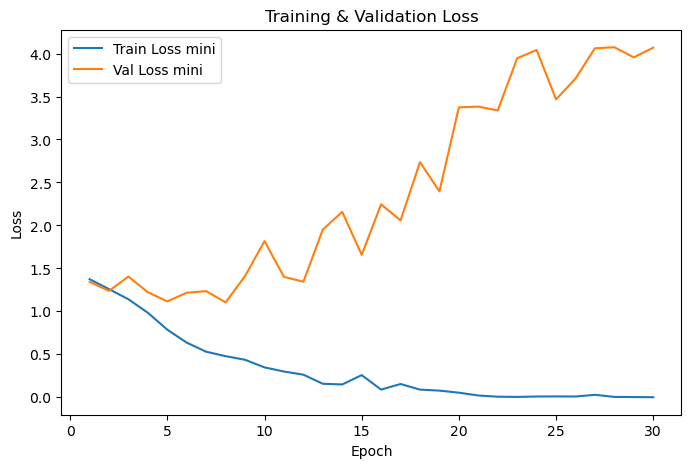

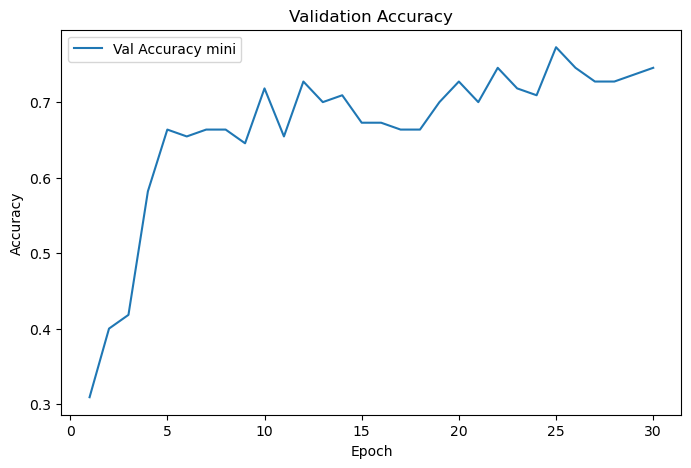

In [ ]:


import matplotlib.pyplot as plt

# 假设 train_losses, val_losses, val_accuracies 
EPOCHS = len(train_losses)

plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), train_losses, label='Train Loss mini')
plt.plot(range(1, EPOCHS+1), val_losses, label='Val Loss mini')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), val_accuracies, label='Val Accuracy mini')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()


- The plot show severe overfitting: training set is almost 0 Loss, but validation loss spikes and accuracy stays around 70%. Because the amount of data is too small and the model capacity is relatively large.

# new model with Data Augmentation, Dropout & Weight Decay

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),            
    transforms.RandomCrop((224, 224)),          
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset_mini = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor-mini\train-mini",
    transform=train_transforms
)
val_dataset_mini = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor-mini\valid-mini",
    transform=val_transforms
)

train_loader_mini = DataLoader(train_dataset_mini, batch_size=32, shuffle=True)
val_loader_mini = DataLoader(val_dataset_mini, batch_size=32, shuffle=False)

print("Mini Train classes:", train_dataset_mini.classes)
print("Number of mini training images:", len(train_dataset_mini))
print("Number of mini validation images:", len(val_dataset_mini))


class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 输入尺寸 224 -> pool:112 -> pool:56 -> pool:28
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.dropout = nn.Dropout(p=0.5)  
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> [batch,16,112,112]
        x = self.pool(F.relu(self.conv2(x)))  # -> [batch,32,56,56]
        x = self.pool(F.relu(self.conv3(x)))  # -> [batch,64,28,28]
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)                   # dropout
        x = self.fc2(x)
        return x

model_mini = BrainTumorCNN(num_classes=4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_mini.to(device)


# weight decay
####################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_mini.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

EPOCHS = 30
train_losses_mini = []
val_losses_mini = []
val_accuracies_mini = []

for epoch in range(EPOCHS):
    # Training Phase
    model_mini.train()
    running_train_loss = 0.0
    for images, labels in train_loader_mini:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_mini(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * images.size(0)
    epoch_train_loss = running_train_loss / len(train_dataset_mini)
    train_losses_mini.append(epoch_train_loss)
    
    # Validation Phase
    model_mini.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader_mini:
            images, labels = images.to(device), labels.to(device)
            outputs = model_mini(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_val_loss = running_val_loss / len(val_dataset_mini)
    val_losses_mini.append(epoch_val_loss)
    epoch_val_acc = correct / total
    val_accuracies_mini.append(epoch_val_acc)
    
    print(f"Epoch [{epoch+1}/{EPOCHS}] - Train Loss: {epoch_train_loss:.4f} - Val Loss: {epoch_val_loss:.4f} - Val Acc: {epoch_val_acc:.4f}")


save_path_mini = r"D:\Desktop\ai\brain_tumor_mini_improved_cnn.pth"
torch.save(model_mini.state_dict(), save_path_mini)
print(f"Improved mini-model saved to {save_path_mini}")


Mini Train classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of mini training images: 478
Number of mini validation images: 110
Epoch [1/30] - Train Loss: 1.3871 - Val Loss: 1.3660 - Val Acc: 0.3091
Epoch [2/30] - Train Loss: 1.3226 - Val Loss: 1.2636 - Val Acc: 0.3818
Epoch [3/30] - Train Loss: 1.1569 - Val Loss: 1.1947 - Val Acc: 0.4909
Epoch [4/30] - Train Loss: 1.1243 - Val Loss: 1.3270 - Val Acc: 0.4727
Epoch [5/30] - Train Loss: 1.0897 - Val Loss: 1.2941 - Val Acc: 0.3818
Epoch [6/30] - Train Loss: 1.0115 - Val Loss: 1.2857 - Val Acc: 0.4818
Epoch [7/30] - Train Loss: 0.9592 - Val Loss: 1.2325 - Val Acc: 0.5545
Epoch [8/30] - Train Loss: 0.9324 - Val Loss: 1.2370 - Val Acc: 0.5727
Epoch [9/30] - Train Loss: 0.9240 - Val Loss: 1.2250 - Val Acc: 0.5000
Epoch [10/30] - Train Loss: 0.8696 - Val Loss: 1.2411 - Val Acc: 0.4364
Epoch [11/30] - Train Loss: 0.8824 - Val Loss: 1.0303 - Val Acc: 0.5818
Epoch [12/30] - Train Loss: 0.8606 - Val Loss: 1.3255 - Val Acc: 0.4182
Ep

# Plot and evaluate

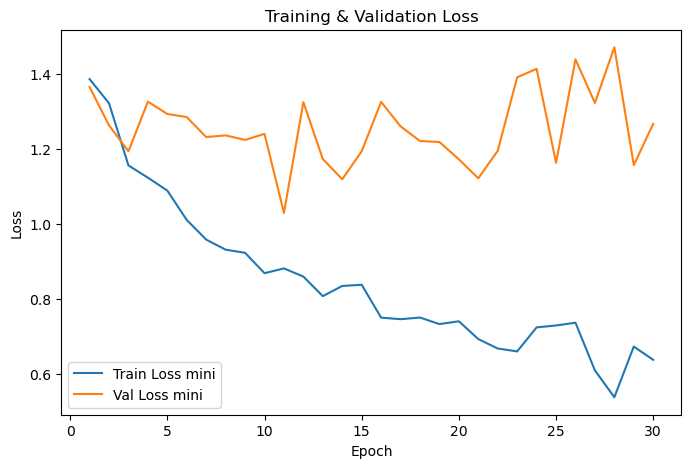

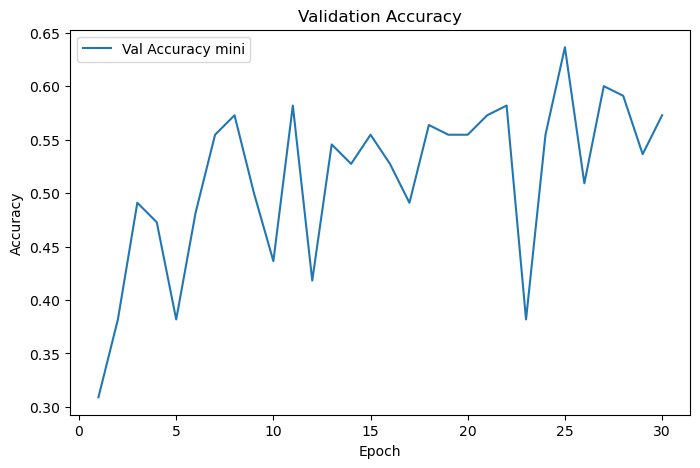

In [14]:
import matplotlib.pyplot as plt

# 假设 train_losses_mini, val_losses_mini, val_accuracies_mini 已经定义
EPOCHS = len(train_losses_mini)

plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), train_losses_mini, label='Train Loss mini')
plt.plot(range(1, EPOCHS+1), val_losses_mini, label='Val Loss mini')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), val_accuracies_mini, label='Val Accuracy mini')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()


- Compared to before, the model converges well on the training set and the validation set accuracy stays at 50% to 60%
- The model has a tendency to "overfit" in the middle of the period, but data augmentation and regularisation help to keep the validation loss around 1.2-1.3, rather than continuing to soar.

# the model’s state_dict and verification

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1) 
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 224 -> pool -> 112 -> pool -> 56 -> pool -> 28
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> [batch,16,112,112]
        x = self.pool(F.relu(self.conv2(x)))  # -> [batch,32,56,56]
        x = self.pool(F.relu(self.conv3(x)))  # -> [batch,64,28,28]
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2) 
model_test = BrainTumorCNN(num_classes=4)

# 3) 
checkpoint_path = r"D:\Desktop\ai\brain_tumor_mini_improved_cnn.pth"
model_test.load_state_dict(torch.load(checkpoint_path, map_location="cpu"))
model_test.eval()
print(f"Loaded model parameters from: {checkpoint_path}")

# 4) 
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 5) 
val_dataset = torchvision.datasets.ImageFolder(
    root=r"D:\Desktop\classify\assignment-dataset\brain-tumor-mini\valid-mini",
    transform=val_transforms
)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 6) 
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model_test(images)  
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_acc = correct / total
print(f"Validation accuracy (loaded model) = {val_acc:.4f}")

C:\Users\84359\AppData\Local\Temp\ipykernel_5252\3995337165.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load(checkpoint_path, map_l

Loaded model parameters from: D:\Desktop\ai\brain_tumor_mini_improved_cnn.pth
Validation accuracy (loaded model) = 0.5727


- For Task 1B, I used the same CNN architecture and training pipeline as in Task 1A. With the mini dataset, I implemented additional strategies such as random cropping for data augmentation, dropout layers, and weight decay to mitigate overfitting. These enhancements improved the model’s generalization on limited data, resulting in a validation loss that stabilized in the later epochs and a validation accuracy.The final validation accuracy on the small dataset is still lower than the results on the large dataset in 1A.